### 1. Generate 2D Gaussian distribution

----------------------------------------

In [1]:
import numpy as np 
from math import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import norm
from IPython.display import Image, display, Math, Latex

# this allows plots to appear directly in the notebook
%matplotlib inline
%config IPCompleter.greedy=True

# Params
n_inpoints = 2000

# Functions 

#### Class 0

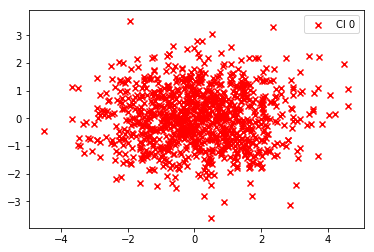

In [2]:
theta0 = 0
lmb01 = 2
lmb02 = 1
m0 = (0,  0)
# computing u * u.T and later multiplying with lambda
cov01 = [[(cos(theta0))**2,    cos(theta0)*sin(theta0)], 
         [(sin(theta0))*cos(theta0), (sin(theta0))**2]]
cov02 = [[(sin(theta0))**2,    -(cos(theta0)*sin(theta0))], 
         [-(cos(theta0)*sin(theta0)), (cos(theta0))**2]]
cov0 = lmb01*np.matrix(cov01) + lmb02*np.matrix(cov02)
cov0_det = np.linalg.det(cov0)
x0, y0 = np.random.multivariate_normal(m0, cov0, int(n_inpoints/2)).T
plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
plt.legend()    
plt.show()

#### Class 1 (Mixture A & B)

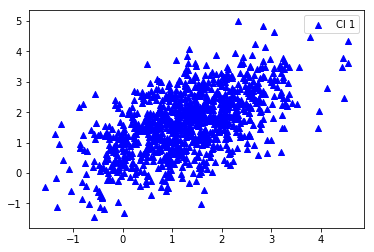

In [3]:
# Mixture A
theta1a = -3*pi/4
lmb1a1 = 2
lmb1a2 = 1/4
m1a = (-2, 1)
cov1a = [[(cos(theta1a))**2,    cos(theta1a)*sin(theta1a)], 
         [(sin(theta1a))*cos(theta1a), (sin(theta1a))**2]]
cov2a = [[(sin(theta1a))**2,    -(cos(theta1a)*sin(theta1a))], 
         [-(cos(theta1a)*sin(theta1a)), (cos(theta1a))**2]]
cov1a = lmb1a1*np.matrix(cov1a) + lmb1a2*np.matrix(cov2a)
cov1a_det = np.linalg.det(cov1a)
x1a, y1a = np.random.multivariate_normal(m1a, cov1a, int(n_inpoints/2)).T

#print('Shape: ',x1a.shape,', ',y1a.shape,', ',cov1a)

# Mixture B
theta1b = pi/4
lmb1b1 = 3
lmb1b2 = 1
m1b = (3, 2)
cov1b = [[(cos(theta1b))**2,    cos(theta1b)*sin(theta1b)], 
         [(sin(theta1b))*cos(theta1b), (sin(theta1b))**2]]
cov2b = [[(sin(theta1b))**2,    -(cos(theta1b)*sin(theta1b))], 
         [-(cos(theta1b)*sin(theta1b)), (cos(theta1b))**2]]
cov1b = lmb1b1*np.matrix(cov1b) + lmb1b2*np.matrix(cov2b)
cov1b_det = np.linalg.det(cov1b)
x1b, y1b = np.random.multivariate_normal(m1b, cov1b, int(n_inpoints/2)).T
#print('Shape: ',x1b.shape,', ',y1b.shape,', ',cov1b)

# Class 1 (A * 0.33 +B * 0.66)
y1 = np.array(y1a)* (1 / 3)+np.array(y1b)* (2 / 3)
x1 = np.array(x1a)* (1 / 3)+np.array(x1b)* (2 / 3)
plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
plt.legend()    
plt.show()

#### Combined plot 

Shape; X: (2000,) , Y: (2000,)


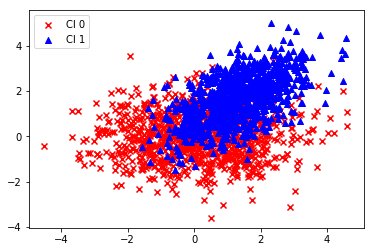

In [4]:
x = np.concatenate((x0, x1))
y = np.concatenate((y0, y1))

print('Shape; X:',x.shape,', Y:',y.shape)
plt.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
plt.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
plt.legend()    
plt.show()

### 2. MAP 

- Compute log likelihoods as log((pdf y1)/(pdf y0)) > 0 ===> [Class1]
- We can then find the values of µ and σ that maximize the log likelihood by taking derivative
with respect to the desired variable and solving the equation obtained.


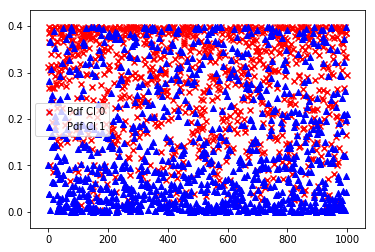

In [5]:
# Take the log likelihood based on the generated data
y0_ll = norm.pdf(y0)
y1_ll = norm.pdf(y1)
y_ll = np.log2(y1_ll / y0_ll) 
#print('LL:',y_ll)

# Printing PDF Y0 and Y1 
freex = np.arange(0, int(n_inpoints/2), 1)
plt.scatter(freex, y0_ll, color = 'r',marker='x', label = 'Pdf Cl 0')
plt.scatter(freex, y1_ll, color = 'b',marker='^', label = 'Pdf Cl 1')
#plt.scatter(freex, z_ll, color = 'y',marker='o', label = 'Cl 1')
plt.legend() 
plt.show()

In [6]:
zx_ll = []
zy_ll = []
# Obtain decision boundary around 0
idx = 0
for xl in y_ll:
    # Compare with 0 (+- 0.5)
    if xl < 0.2 and xl > -0.2:       
        zy_ll.append(y[idx])
        zx_ll.append(x[idx])
    idx = idx+1
# Taking first two points: ==> FIX ME
# need a slope and c to fix the position of line
slope = (zy_ll[0]-zy_ll[1]) / (zx_ll[0]-zx_ll[1])
c = zy_ll[0] - slope * zx_ll[0]
print(c, slope)


# Estimating the mean vector. 
# Not used right now
combined = np.vstack((x, y)).T
muMle = np.mean(combined)
print('MLE')
print('u:', muMle)
covMle = np.cov(x,y)
print('C:', covMle)

0.6079497698012215 -0.530417287492046
MLE
u: 0.7717306201940289
C: [[1.93932604 0.80746789]
 [0.80746789 1.75272806]]


Shape; X: (2000,) , Y: (2000,)


C:\Users\Karma\Anaconda3\envs\tflo\lib\site-packages\scipy\optimize\minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 3000.
  warnings.warn(errors[info][0], RuntimeWarning)


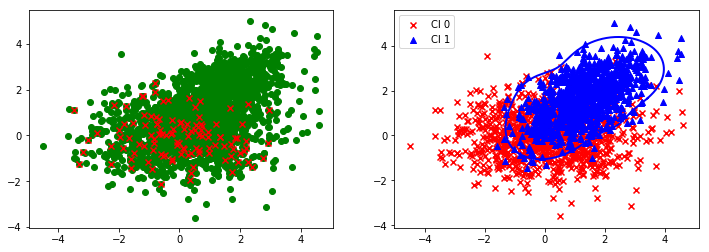

In [7]:
from numpy import sin, cos, pi
from scipy.optimize import leastsq
# Contour drawing helper function
def find_boundary(x, y, n, plot_pts=1000):

    def sines(theta):
        ans = np.array([sin(i*theta)  for i in range(n+1)])
        return ans

    def cosines(theta):
        ans = np.array([cos(i*theta)  for i in range(n+1)])
        return ans

    def residual(params, x, y):
        x0 = params[0]
        y0 = params[1]
        c = params[2:]

        r_pts = ((x-x0)**2 + (y-y0)**2)**0.5

        thetas = np.arctan2((y-y0), (x-x0))
        m = np.vstack((sines(thetas), cosines(thetas))).T
        r_bound = m.dot(c)

        delta = r_pts - r_bound
        delta[delta>0] *= 10

        return delta

    # initial guess for x0 and y0
    x0 = x.mean()
    y0 = y.mean()

    params = np.zeros(2 + 2*(n+1))
    params[0] = x0
    params[1] = y0
    params[2:] += 1000

    popt, pcov = leastsq(residual, x0=params, args=(x, y),
                         ftol=1.e-12, xtol=1.e-12)

    thetas = np.linspace(0, 2*pi, plot_pts)
    m = np.vstack((sines(thetas), cosines(thetas))).T
    c = np.array(popt[2:])
    r_bound = m.dot(c)
    x_bound = x0 + r_bound*cos(thetas)
    y_bound = y0 + r_bound*sin(thetas)

    return x_bound, y_bound

# plot - 
# ==============================
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
print('Shape; X:',x.shape,', Y:',y.shape)
ax1.scatter(x, y, color = 'g',marker='o', label = 'Cl Unknown')
ax1.scatter(zx_ll, zy_ll, color = 'r',marker='x', label = 'Lin Cl')

xb0, yb0 = find_boundary(x0, y0, 5)
#ax2.plot(xb0, yb0, '-r', lw=2.)

xb1, yb1 = find_boundary(x1, y1, 5)
ax2.plot(xb1, yb1, '-b', lw=2.)

ax2.scatter(x0, y0, color = 'r',marker='x', label = 'Cl 0')
ax2.scatter(x1, y1, color = 'b',marker='^', label = 'Cl 1')
ax2.legend()   

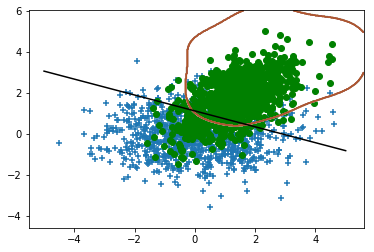

In [8]:
import scipy
from sklearn import svm

c0 = np.vstack((x0, y0)).T
c1 = np.vstack((x1, y1)).T

fig = plt.figure()
plt.scatter(x0,y0, marker='+')
plt.scatter(x1,y1, c= 'green', marker='o')

# Set up the [xi, yi] training data vector
X = np.concatenate((c0,c1), axis = 0)
Y = np.array([0]*int(n_inpoints/2) + [1]*int(n_inpoints/2))

# ------------ 

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')

# ------------ 

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'rbf',  gamma=0.7, C=C )
clf.fit(X, Y)

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

